# 04 - Preprocessing And Training

## 4.1 Table of Contents:

## 4.2 Introduction:

## 4.3 Imports & Load Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns
import scipy.stats

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import featuretools as ft
from sklearn import neighbors, datasets, preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve


In [2]:
#load data
metadata = pd.read_csv('../src/data/Cleaned/metadata_postEDA.csv',index_col = 0)
ratings = pd.read_csv('../src/data/Cleaned/ratings_postEDA.csv', index_col = 0)

## 4.3.1 Explore Data:

In [3]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44906 entries, 0 to 44983
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4463 non-null   object 
 1   budget                 8851 non-null   float64
 2   genres                 44906 non-null  object 
 3   movieId                44906 non-null  int64  
 4   original_language      44896 non-null  object 
 5   overview               43999 non-null  object 
 6   popularity             44906 non-null  float64
 7   production_companies   44906 non-null  object 
 8   production_countries   44906 non-null  object 
 9   release_date           44906 non-null  object 
 10  revenue                7385 non-null   float64
 11  runtime                44666 non-null  float64
 12  spoken_languages       44906 non-null  object 
 13  tagline                20276 non-null  object 
 14  title                  44906 non-null  object 
 15  vote_av

In [4]:
metadata.T

,0,1,2,3,4,5,6,7,8,9,...,44973,44974,44975,44976,44977,44978,44980,44981,44982,44983
belongs_to_collection,Toy Story Collection,NaN,Grumpy Old Men Collection,NaN,Father of the Bride Collection,NaN,NaN,NaN,NaN,James Bond Collection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,30000000.0,65000000.0,NaN,16000000.0,NaN,60000000.0,58000000.0,NaN,35000000.0,58000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genres,"['Animation', 'Comedy', 'Family']","['Adventure', 'Fantasy', 'Family']","['Romance', 'Comedy']","['Comedy', 'Drama', 'Romance']",['Comedy'],"['Action', 'Crime', 'Drama', 'Thriller']","['Comedy', 'Romance']","['Action', 'Adventure', 'Drama', 'Family']","['Action', 'Adventure', 'Thriller']","['Adventure', 'Action', 'Thriller']",...,[],"['Horror', 'Mystery', 'Thriller']","['Mystery', 'Horror']",['Horror'],['Science Fiction'],"['Drama', 'Action', 'Romance']",['Drama'],"['Action', 'Drama', 'Thriller']",[],[]
movieId,862,8844,15602,31357,11862,949,11860,45325,9091,710,...,67179,84419,390959,289923,222848,30840,111109,67758,227506,461257
original_language,en,en,en,en,en,en,en,en,en,en,...,it,en,en,en,en,en,tl,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...,"Obsessive master thief, Neil McCauley leads a ...",An ugly duckling having undergone a remarkable...,"A mischievous young boy, Tom Sawyer, witnesses...",International action superstar Jean Claude Van...,James Bond must unmask the mysterious head of ...,...,Sentenced to life imprisonment for illegal act...,An unsuccessful sculptor saves a madman named ...,"In this true-crime documentary, we delve into ...",A film archivist revisits the story of Rustin ...,It's the year 3000 AD. The world's most danger...,"Yet another version of the classic epic, with ...",An artist struggles to finish his work while a...,"When one of her hits goes wrong, a professiona...","In a small town live two brothers, one a minis...",50 years after decriminalisation of homosexual...
popularity,21.946943,17.015539,11.7129,3.859495,8.387519,17.924927,6.677277,2.561161,5.23158,14.686036,...,0.225051,0.222814,0.076061,0.38645,0.661558,5.683753,0.178241,0.903007,0.003503,0.163015
production_companies,['Pixar Animation Studios'],"['TriStar Pictures', 'Teitler Film', 'Intersco...","['Warner Bros.', 'Lancaster Gate']",['Twentieth Century Fox Film Corporation'],"['Sandollar Productions', 'Touchstone Pictures']","['Regency Enterprises', 'Forward Pass', 'Warne...","['Paramount Pictures', 'Scott Rudin Production...",['Walt Disney Pictures'],"['Universal Pictures', 'Imperial Entertainment...","['United Artists', 'Eon Productions']",...,[],['Universal Pictures'],[],"['Neptune Salad Entertainment', 'Pirie Product...",['Concorde-New Horizons'],"['Westdeutscher Rundfunk (WDR)', 'Working Titl...",['Sine Olivia'],['American World Pictures'],['Yermoliev'],[]
production_countries,['US'],['US'],['US'],['US'],['US'],['US'],"['DE', 'US']",['US'],['US'],"['GB', 'US']",...,[],['US'],[],['US'],['US'],"['CA', 'DE', 'GB', 'US']",['PH'],['US'],['RU'],['GB']
release_date,1995-10-30,1995-12-15,1995-12-22,1995-12-22,1995-02-10,1995-12-15,1995-12-15,1995-12-22,1995-12-22,1995-11-16,...,1972-01-01,1946-03-29,2000-10-22,2000-10-03,1995-01-01,1991-05-13,2011-11-17,2003-08-01,1917-10-21,2017-06-09


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26024289 entries, 0 to 26024288
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   movieId  int64  
 1   userId   int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 794.2 MB


In [6]:
ratings.head()

,movieId,userId,rating
0,110,1,1.0
1,147,1,4.5
2,858,1,5.0
3,1221,1,5.0
4,1246,1,5.0


## 4.3.2 Fixing Categorical Data:

Let's explore the data and alter, clean the categorical dataset and prep it for modelling.

In [7]:
#Start off by converting string of list to list of strings. 
metadata['genres'] = metadata['genres'].apply(literal_eval).apply(lambda x: [str(i) for i in x])
metadata['production_companies'] = metadata['production_companies'].apply(literal_eval).apply(lambda x: [str(i) for i in x])
metadata['production_countries'] = metadata['production_countries'].apply(literal_eval).apply(lambda x: [str(i) for i in x])
metadata['keyword'] = metadata['keyword'].apply(literal_eval).apply(lambda x: [str(i) for i in x])
metadata['spoken_languages'] = metadata['spoken_languages'].apply(literal_eval).apply(lambda x: [str(i) for i in x])
metadata['actor_names'] = metadata['actor_names'].apply(literal_eval).apply(lambda x: [str(i) for i in x])

In [8]:
metadata.T

,0,1,2,3,4,5,6,7,8,9,...,44973,44974,44975,44976,44977,44978,44980,44981,44982,44983
belongs_to_collection,Toy Story Collection,NaN,Grumpy Old Men Collection,NaN,Father of the Bride Collection,NaN,NaN,NaN,NaN,James Bond Collection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,30000000.0,65000000.0,NaN,16000000.0,NaN,60000000.0,58000000.0,NaN,35000000.0,58000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genres,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]","[Comedy, Drama, Romance]",[Comedy],"[Action, Crime, Drama, Thriller]","[Comedy, Romance]","[Action, Adventure, Drama, Family]","[Action, Adventure, Thriller]","[Adventure, Action, Thriller]",...,[],"[Horror, Mystery, Thriller]","[Mystery, Horror]",[Horror],[Science Fiction],"[Drama, Action, Romance]",[Drama],"[Action, Drama, Thriller]",[],[]
movieId,862,8844,15602,31357,11862,949,11860,45325,9091,710,...,67179,84419,390959,289923,222848,30840,111109,67758,227506,461257
original_language,en,en,en,en,en,en,en,en,en,en,...,it,en,en,en,en,en,tl,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...,"Obsessive master thief, Neil McCauley leads a ...",An ugly duckling having undergone a remarkable...,"A mischievous young boy, Tom Sawyer, witnesses...",International action superstar Jean Claude Van...,James Bond must unmask the mysterious head of ...,...,Sentenced to life imprisonment for illegal act...,An unsuccessful sculptor saves a madman named ...,"In this true-crime documentary, we delve into ...",A film archivist revisits the story of Rustin ...,It's the year 3000 AD. The world's most danger...,"Yet another version of the classic epic, with ...",An artist struggles to finish his work while a...,"When one of her hits goes wrong, a professiona...","In a small town live two brothers, one a minis...",50 years after decriminalisation of homosexual...
popularity,21.946943,17.015539,11.7129,3.859495,8.387519,17.924927,6.677277,2.561161,5.23158,14.686036,...,0.225051,0.222814,0.076061,0.38645,0.661558,5.683753,0.178241,0.903007,0.003503,0.163015
production_companies,[Pixar Animation Studios],"[TriStar Pictures, Teitler Film, Interscope Co...","[Warner Bros., Lancaster Gate]",[Twentieth Century Fox Film Corporation],"[Sandollar Productions, Touchstone Pictures]","[Regency Enterprises, Forward Pass, Warner Bros.]","[Paramount Pictures, Scott Rudin Productions, ...",[Walt Disney Pictures],"[Universal Pictures, Imperial Entertainment, S...","[United Artists, Eon Productions]",...,[],[Universal Pictures],[],"[Neptune Salad Entertainment, Pirie Productions]",[Concorde-New Horizons],"[Westdeutscher Rundfunk (WDR), Working Title F...",[Sine Olivia],[American World Pictures],[Yermoliev],[]
production_countries,[US],[US],[US],[US],[US],[US],"[DE, US]",[US],[US],"[GB, US]",...,[],[US],[],[US],[US],"[CA, DE, GB, US]",[PH],[US],[RU],[GB]
release_date,1995-10-30,1995-12-15,1995-12-22,1995-12-22,1995-02-10,1995-12-15,1995-12-15,1995-12-22,1995-12-22,1995-11-16,...,1972-01-01,1946-03-29,2000-10-22,2000-10-03,1995-01-01,1991-05-13,2011-11-17,2003-08-01,1917-10-21,2017-06-09


In [9]:
#metadata[metadata['genres'].apply(lambda genre_list: len(genre_list) == 0)]

## 4.4 Feature Engineering:

This Section will be split into 4 subsection for each recommender sytem. This way we can focus on exactly whats needed for our end models rather than over engineering.

## 4.4.1 Simple Recommender System:

As Previously mentioned, Simple recommender suggests trending recommendations based on Popularity. (ie. # of votes and vote average score). I could just simply sort metadata by 'vote_average' and recommend the highest rated movie to our client. However, for this system i would like to take a different metric and use IMDB's weighted rating formula to construct my chart.

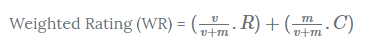

where,

* v = number of votes for the movie.
* m = minimum votes required to be listed in the chart.
* R = average rating of the movie.
* C = mean vote across the whole report.

We have v(vote_count) and R(vote_average) in our metadata. The next step is to determine an appropriate value for m and C. For m we will use 95th percentile as our cutoff and pick movies greater than this number to be considered for this list.

In [10]:
C = metadata['vote_average'].mean()
C

5.629688683026767

In [11]:
m= metadata['vote_count'].quantile(0.95)
m

440.0

In [12]:
q_movies = metadata[metadata['vote_count'] >=m]
q_movies.shape

(2248, 22)

Movie must have more than 440 votes to qualify for recommender system, this reduces our metadata to just 2248 movies.

In [13]:
#Defining our Weighted Rating function.
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    #Calculation based in imdb formula.
    return (v/(v+m) * R) + (m/(m+v) * C)

In [14]:
# Define a new feature 'WR' and calculate its value with `weighted_rating()`
q_movies['WR'] = q_movies.apply(weighted_rating, axis=1)

In [15]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('WR', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'WR']].head(10)

,title,vote_count,vote_average,WR
313,The Shawshank Redemption,8358.0,8.5,8.356452
830,The Godfather,6024.0,8.5,8.304620
12421,The Dark Knight,12269.0,8.3,8.207551
2829,Fight Club,9678.0,8.3,8.183877
291,Pulp Fiction,8670.0,8.3,8.171028
350,Forrest Gump,8147.0,8.2,8.068297
521,Schindler's List,4436.0,8.3,8.059037
23505,Whiplash,4376.0,8.3,8.056035
5455,Spirited Away,3968.0,8.3,8.033453
15402,Inception,14075.0,8.1,8.025116


These are the **Top 10 Recommended movies** using IMDB's Weighted Rating normalization.

## 4.4.2 Content-Based Recommendation System:

In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

### 4.4.2.1 Overview Based recommendation:

This is where we will be applying our learnings from feature engineering to action. The strategy here would be to first normalize free text data and then use similarty algorithms to find related movies.

In [16]:
## Lets start by removing unwanted characters and applying lowercase to overview feature.
metadata['overview'] = metadata['overview'].fillna('')

# Replace all non letter characters with a whitespace
metadata['overview'] = metadata['overview'].str.replace('[^a-zA-Z]', ' ')

# Change to lower case
metadata['overview']  = metadata['overview'].str.lower()

# Print the first 5 rows of the overview column
metadata['overview'] .head()

0    led by woody, andy's toys live happily in his ...
1    when siblings judy and peter discover an encha...
2    a family wedding reignites the ancient feud be...
3    cheated on, mistreated and stepped on, the wom...
4    just when george banks has recovered from his ...
Name: overview, dtype: object

### Train & Test Data Split:

Since 'Overview' is a free text data, we the option in Scikit learn module to normalize the dataset.

TF-iDF = Term Frequency inverse Document Frequency, as a base function we can use it to give each word in the text a score. This particular text normalizer reduces the score of repetative words like 'the', 'and' etc.


### TF-iDF Text Normalization

In [17]:
# Instantiate TfidfVectorizer
tv = TfidfVectorizer(stop_words='english')
#TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0.0, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(metadata['overview'])

# Create new features for the test set
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                          columns=tv.get_feature_names_out()).add_prefix('TFIDF_')

In [18]:
tv_df.shape

(44906, 75322)

We have ~75k unique words in 44906 movies.

In [19]:
tv_df.head()

,TFIDF_00,TFIDF_000,TFIDF_000km,TFIDF_000th,TFIDF_001,TFIDF_006,TFIDF_007,TFIDF_008,TFIDF_009,TFIDF_0093,...,TFIDF_ようなもの,TFIDF_患者さんとその世界,TFIDF_水俣,TFIDF_海難1890,TFIDF_見鬼10,TFIDF_주식회사,TFIDF_찾기,TFIDF_첫사랑,TFIDF_ﬁrst,TFIDF_ﬁve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Isolate the row to be examined
sample_row = tv_df.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

TFIDF_buzz         0.502099
TFIDF_woody        0.482126
TFIDF_andy         0.411633
TFIDF_lightyear    0.206046
TFIDF_toys         0.148547
Name: 0, dtype: float64


### 4.4.2.2 Keyword, Genre, Cast and Director based Recommendation:

### Creating a feature of word soup

Here we try to create a new feature with all keyword, genre, cast and director combined. But first lets trim down the some of these features to only look at the top 3 elements in the list.

In [17]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(names):
    if isinstance(names, list):
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [18]:
features = ['actor_names', 'keyword', 'genres']
for feature in features:
    metadata[feature] = metadata[feature].apply(get_list)

In [19]:
#Checking database of the altered feature to ensure we have 3 elements or less.
metadata[['title','actor_names', 'director', 'keyword', 'genres']].head(3)

,title,actor_names,director,keyword,genres
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy]","[Animation, Comedy, Family]"
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[fishing, best friend, duringcreditsstinger]","[Romance, Comedy]"


Time to clean up the dataset by making them all lower case and removing spaces.

In [20]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [21]:
# Apply clean_data function to your features.
features = ['actor_names', 'director', 'keyword', 'genres']

for feature in features:
    metadata[feature] = metadata[feature].apply(clean_data)

In [22]:
#Checking database of the altered features.
metadata[['title','actor_names', 'director', 'keyword', 'genres']].head(3)

,title,actor_names,director,keyword,genres
0,Toy Story,"[tomhanks, timallen, donrickles]",johnlasseter,"[jealousy, toy, boy]","[animation, comedy, family]"
1,Jumanji,"[robinwilliams, jonathanhyde, kirstendunst]",joejohnston,"[boardgame, disappearance, basedonchildren'sbook]","[adventure, fantasy, family]"
2,Grumpier Old Men,"[waltermatthau, jacklemmon, ann-margret]",howarddeutch,"[fishing, bestfriend, duringcreditsstinger]","[romance, comedy]"


Now we can go ahead and create a word soup of our features.

In [23]:
def create_soup(x):
    return ' '.join(x['keyword']) + ' ' + ' '.join(x['actor_names']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
metadata['soup'] = metadata.apply(create_soup, axis=1)

In [24]:
#Verify new feature
metadata[['title', 'soup']].head(3)

,title,soup
0,Toy Story,jealousy toy boy tomhanks timallen donrickles ...
1,Jumanji,boardgame disappearance basedonchildren'sbook ...
2,Grumpier Old Men,fishing bestfriend duringcreditsstinger walter...


### Count Vectorizer

Now we follow the same step as before to normalize the text data, this time it's not free text data and we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. Therefore, we will be using a Count Vectorizer instead of TF-iDF.

In [25]:
cv = CountVectorizer(stop_words='english')
cv_transformed = cv.fit_transform(metadata['soup'])

# Create new features for the test set
cv_df = pd.DataFrame(cv_transformed.toarray(), 
                          columns=cv.get_feature_names_out()).add_prefix('CV_')

In [26]:
cv_df.shape

(44906, 75296)

Interestingly we also have roughly 75k unique words for 44905 movies.

In [27]:
cv_df.head()

,CV_077,CV_11,CV_16thcentury,CV_17thcentury,CV_18thcentury,CV_1910s,CV_1920s,CV_1930s,CV_1940s,CV_1950s,...,CV_부러진화살,CV_소원,CV_오싹한연애,CV_위험한소문,CV_조병만,CV_진모영,CV_찌라시,CV_카운트다운,CV_하울링,CV_형사duelist
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Isolate the row to be examined
sample_row = cv_df.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

CV_toy             1
CV_family          1
CV_tomhanks        1
CV_johnlasseter    1
CV_timallen        1
Name: 0, dtype: int64


**cv_df and tv_df are now ready to be used in the next step where i will be applying similarity algorithms to provide recommendations. We can evaluate how well these 2 different types of recommendations systems perform.**

## 4.4.3 Collaborative Recommendation System: